In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/teja1805/Downloads/linkedin_skills.csv")

In [3]:
data.head()

,Unnamed: 0,Name,skills
0,0,hariseth,Oracle E-Business Suite
1,1,hariseth,Shared Services
2,2,hariseth,Business Process Improvement
3,3,hariseth,Oracle HR
4,4,hariseth,ERP


In [6]:
data.columns.values

array(['Unnamed: 0', 'Name', 'skills'], dtype=object)

In [28]:
data=pd.read_csv("/home/teja1805/Downloads/linkedin_skills.csv")

In [29]:
data

,Unnamed: 0,Name,skills
0,0,hariseth,Oracle E-Business Suite
1,1,hariseth,Shared Services
2,2,hariseth,Business Process Improvement
3,3,hariseth,Oracle HR
4,4,hariseth,ERP
...,...,...,...
41286,41286,pratyushseth,Leadership
41287,41287,pratyushseth,MapReduce
41288,41288,pratyushseth,Cloud Computing
41289,41289,pratyushseth,REST


In [30]:
data.index
data.columns.values

array(['Unnamed: 0', 'Name', 'skills'], dtype=object)

In [31]:
data=data.rename(columns={"Unnamed: 0":"ID"})

In [32]:
data

,ID,Name,skills
0,0,hariseth,Oracle E-Business Suite
1,1,hariseth,Shared Services
2,2,hariseth,Business Process Improvement
3,3,hariseth,Oracle HR
4,4,hariseth,ERP
...,...,...,...
41286,41286,pratyushseth,Leadership
41287,41287,pratyushseth,MapReduce
41288,41288,pratyushseth,Cloud Computing
41289,41289,pratyushseth,REST


In [15]:
#data.index

RangeIndex(start=0, stop=41291, step=1)

In [16]:
#data.index.values

array([    0,     1,     2, ..., 41288, 41289, 41290])

In [19]:
#data.set_index("ID",inplace=True)

In [33]:
data

,ID,Name,skills
0,0,hariseth,Oracle E-Business Suite
1,1,hariseth,Shared Services
2,2,hariseth,Business Process Improvement
3,3,hariseth,Oracle HR
4,4,hariseth,ERP
...,...,...,...
41286,41286,pratyushseth,Leadership
41287,41287,pratyushseth,MapReduce
41288,41288,pratyushseth,Cloud Computing
41289,41289,pratyushseth,REST


In [34]:
data["Name"].nunique()

1616

In [35]:
data["skills"].nunique()

7313

In [36]:
#data.describe()

,ID
count,41291.000000
mean,20645.000000
std,11919.829319
min,0.000000
25%,10322.500000
50%,20645.000000
75%,30967.500000
max,41290.000000


In [37]:
data["skills"].value_counts()

Management               577
Team Management          445
Leadership               439
Project Management       393
SQL                      335
                        ... 
Post Traumatic Stress      1
Economic Capital           1
Completion                 1
Pandit                     1
Dance                      1
Name: skills, Length: 7313, dtype: int64

In [38]:
reload(svdRec)

NameError: name 'reload' is not defined

In [39]:
from importlib import reload

In [40]:
reload(svdRec)

NameError: name 'svdRec' is not defined

## Problem

There is a dataset which is scrapped contains skills of some linkedin profiles
We want to create a skill recommendation engine where it recommend 10 similar skills for every skill

In [7]:
from datetime import datetime # importing to know the run time of the code
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
matplotlib.use('nbagg')
import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

In [8]:
#PRESENT DATASET
df=pd.read_csv("/home/teja1805/Downloads/AI/linkedin_skills.csv")
df

,Unnamed: 0,Name,skills
0,0,hariseth,Oracle E-Business Suite
1,1,hariseth,Shared Services
2,2,hariseth,Business Process Improvement
3,3,hariseth,Oracle HR
4,4,hariseth,ERP
...,...,...,...
41286,41286,pratyushseth,Leadership
41287,41287,pratyushseth,MapReduce
41288,41288,pratyushseth,Cloud Computing
41289,41289,pratyushseth,REST


In [9]:
df["Unnamed: 0"].nunique()

41291

In [10]:
df["Name"].value_counts().sum()

41291

In [11]:
col=pd.Series([5]*df["Name"].value_counts().sum(),index=df.index)

In [12]:
col

0        5
1        5
2        5
3        5
4        5
        ..
41286    5
41287    5
41288    5
41289    5
41290    5
Length: 41291, dtype: int64

In [13]:
df.assign(rating=col.values)

,Unnamed: 0,Name,skills,rating
0,0,hariseth,Oracle E-Business Suite,5
1,1,hariseth,Shared Services,5
2,2,hariseth,Business Process Improvement,5
3,3,hariseth,Oracle HR,5
4,4,hariseth,ERP,5
...,...,...,...,...
41286,41286,pratyushseth,Leadership,5
41287,41287,pratyushseth,MapReduce,5
41288,41288,pratyushseth,Cloud Computing,5
41289,41289,pratyushseth,REST,5


In [14]:
df["Rating"]=col

In [15]:
df

,Unnamed: 0,Name,skills,Rating
0,0,hariseth,Oracle E-Business Suite,5
1,1,hariseth,Shared Services,5
2,2,hariseth,Business Process Improvement,5
3,3,hariseth,Oracle HR,5
4,4,hariseth,ERP,5
...,...,...,...,...
41286,41286,pratyushseth,Leadership,5
41287,41287,pratyushseth,MapReduce,5
41288,41288,pratyushseth,Cloud Computing,5
41289,41289,pratyushseth,REST,5


In [16]:
df=df[['skills','Name','rating']]

KeyError: "['rating'] not in index"

In [17]:
df=df.reindex(columns=['skills','Name','rating'])

In [18]:
df['rating']=pd.Series([5]*41290)

In [19]:
df

,skills,Name,rating
0,Oracle E-Business Suite,hariseth,5.0
1,Shared Services,hariseth,5.0
2,Business Process Improvement,hariseth,5.0
3,Oracle HR,hariseth,5.0
4,ERP,hariseth,5.0
...,...,...,...
41286,Leadership,pratyushseth,5.0
41287,MapReduce,pratyushseth,5.0
41288,Cloud Computing,pratyushseth,5.0
41289,REST,pratyushseth,5.0


In [20]:
df['rating']=df['rating'].fillna(5)

In [21]:
df

,skills,Name,rating
0,Oracle E-Business Suite,hariseth,5.0
1,Shared Services,hariseth,5.0
2,Business Process Improvement,hariseth,5.0
3,Oracle HR,hariseth,5.0
4,ERP,hariseth,5.0
...,...,...,...
41286,Leadership,pratyushseth,5.0
41287,MapReduce,pratyushseth,5.0
41288,Cloud Computing,pratyushseth,5.0
41289,REST,pratyushseth,5.0


In [22]:
df['rating']=df['rating'].apply(np.int64)

In [23]:
df

,skills,Name,rating
0,Oracle E-Business Suite,hariseth,5
1,Shared Services,hariseth,5
2,Business Process Improvement,hariseth,5
3,Oracle HR,hariseth,5
4,ERP,hariseth,5
...,...,...,...
41286,Leadership,pratyushseth,5
41287,MapReduce,pratyushseth,5
41288,Cloud Computing,pratyushseth,5
41289,REST,pratyushseth,5


In [24]:
df['skills'].nunique()

7313

In [25]:
df['skills'].value_counts()

Management                          577
Team Management                     445
Leadership                          439
Project Management                  393
SQL                                 335
                                   ... 
etherium                              1
Social Perceptiveness                 1
Core Data                             1
#automation                           1
AWS Command Line Interface (CLI)      1
Name: skills, Length: 7313, dtype: int64

In [26]:
df['skill_id']=df.groupby(['skills']).ngroup()

In [27]:
df

,skills,Name,rating,skill_id
0,Oracle E-Business Suite,hariseth,5,4294
1,Shared Services,hariseth,5,5666
2,Business Process Improvement,hariseth,5,789
3,Oracle HR,hariseth,5,4303
4,ERP,hariseth,5,1943
...,...,...,...,...
41286,Leadership,pratyushseth,5,3405
41287,MapReduce,pratyushseth,5,3657
41288,Cloud Computing,pratyushseth,5,1143
41289,REST,pratyushseth,5,4997


In [28]:
if(df['skills'].nunique()==df['skill_id'].nunique()):
    print(True)

True


In [29]:
df['skill_id'].nunique()

7313

In [30]:
df['skills'].nunique()

7313

In [31]:
df['user_id']=df.groupby(['Name']).ngroup()

In [32]:
df

,skills,Name,rating,skill_id,user_id
0,Oracle E-Business Suite,hariseth,5,4294,507
1,Shared Services,hariseth,5,5666,507
2,Business Process Improvement,hariseth,5,789,507
3,Oracle HR,hariseth,5,4303,507
4,ERP,hariseth,5,1943,507
...,...,...,...,...,...
41286,Leadership,pratyushseth,5,3405,965
41287,MapReduce,pratyushseth,5,3657,965
41288,Cloud Computing,pratyushseth,5,1143,965
41289,REST,pratyushseth,5,4997,965


In [33]:
if(df['Name'].nunique()==df['user_id'].nunique()):
    print(True)

True


In [34]:
#sorting the data by skill id ###Later came to know that sorting the data by skill id doesn't look good...when it comes to splitting the data into train and test...all the test data includes only the new skills...so commenting this and running all cells
#df.sort_values(by='skill_id',inplace=True)

In [35]:
df

,skills,Name,rating,skill_id,user_id
0,Oracle E-Business Suite,hariseth,5,4294,507
1,Shared Services,hariseth,5,5666,507
2,Business Process Improvement,hariseth,5,789,507
3,Oracle HR,hariseth,5,4303,507
4,ERP,hariseth,5,1943,507
...,...,...,...,...,...
41286,Leadership,pratyushseth,5,3405,965
41287,MapReduce,pratyushseth,5,3657,965
41288,Cloud Computing,pratyushseth,5,1143,965
41289,REST,pratyushseth,5,4997,965


In [36]:
#sorting the data by user id but original dataframe remains sorted by skill id
df.sort_values(by='user_id')

,skills,Name,rating,skill_id,user_id
36129,Eagle PCB,aadeshgupta,5,1956,0
38220,Python,aadeshgupta,5,4930,0
35549,KiCAD,aadeshgupta,5,3325,0
37984,C,aadeshgupta,5,821,0
2521,Data Structures,aadeshgupta,5,1661,0
...,...,...,...,...,...
34772,jQuery,yogeshyadav,5,7133,1615
34773,Node.js,yogeshyadav,5,4084,1615
34774,MySQL,yogeshyadav,5,3979,1615
34776,Python,yogeshyadav,5,4930,1615


In [37]:
df['skill_id'].describe()

count    41291.000000
mean      3605.247027
std       2022.841323
min          0.000000
25%       1781.500000
50%       3686.000000
75%       5396.000000
max       7312.000000
Name: skill_id, dtype: float64

In [38]:
# checking for nan values
print("No.of nan values in our dataframe : ",sum(df.isnull().any()))

No.of nan values in our dataframe :  0


In [39]:
#checking duplicate entries
dup_bool=df.duplicated(['Name','skills'])
dups=sum(dup_bool)
print("Total no.of duplicate entries in our dataframe : ",dups)

Total no.of duplicate entries in our dataframe :  0


In [40]:
#Just checking if anything goes wrong with user id and skill id
dup_bool=df.duplicated(['skill_id','user_id','rating'])
dups=sum(dup_bool)
print("Total no.of duplicate entries in our dataframe : ",dups)

Total no.of duplicate entries in our dataframe :  0


In [41]:
data=df[['rating','user_id','skill_id']]
data.iloc[:int(data.shape[0]*0.8)]

,rating,user_id,skill_id
0,5,507,4294
1,5,507,5666
2,5,507,789
3,5,507,4303
4,5,507,1943
...,...,...,...
33027,5,569,5409
33028,5,569,1790
33029,5,569,3680
33030,5,883,6880


In [42]:
#Some statistical data
print("***Total Data***")
print("Total no.of ratings : ",df.shape[0])
print("Total no.of Users : ",len(np.unique(data.user_id)))
print("Total no.of Skills : ",len(np.unique(data.skill_id)))

***Total Data***
Total no.of ratings :  41291
Total no.of Users :  1616
Total no.of Skills :  7313


In [43]:
if os.path.isfile('train.csv'):
    #creating the dataframe just in case to use offline
    df.iloc[:int(df.shape[0]*0.8)].to_csv("train.csv",index=False)
if os.path.isfile('test.csv'):
    df.iloc[int(df.shape[0]*0.8):].to_csv("test.csv",index=False)
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [44]:
train_df.head()

,skills,Name,rating,skill_id,user_id
0,Oracle E-Business Suite,hariseth,5,4294,507
1,Shared Services,hariseth,5,5666,507
2,Business Process Improvement,hariseth,5,789,507
3,Oracle HR,hariseth,5,4303,507
4,ERP,hariseth,5,1943,507


In [45]:
train_df=train_df[['skill_id','user_id','rating']]
test_df=test_df[['skill_id','user_id','rating']]
train_df.head()

,skill_id,user_id,rating
0,4294,507,5
1,5666,507,5
2,789,507,5
3,4303,507,5
4,1943,507,5


In [46]:
test_df.head()

,skill_id,user_id,rating
0,852,883,5
1,3566,883,5
2,1567,883,5
3,18,883,5
4,5448,883,5


In [47]:
#Some statistical data
print("***Training Data***")
print('-'*50)
print("Total no.of ratings : ",train_df.shape[0])
print("Total no.of Users : ",len(np.unique(train_df.user_id)))
print("Total no.of Skills : ",len(np.unique(train_df.skill_id)))

***Training Data***
--------------------------------------------------
Total no.of ratings :  33032
Total no.of Users :  1367
Total no.of Skills :  6473


In [48]:
#Some statistical data
print("***Test Data***")
print('-'*50)
print("Total no.of ratings : ",test_df.shape[0])
print("Total no.of Users : ",len(np.unique(test_df.user_id)))
print("Total no.of Skills : ",len(np.unique(test_df.skill_id)))

***Test Data***
--------------------------------------------------
Total no.of ratings :  8259
Total no.of Users :  724
Total no.of Skills :  2516


In [49]:
## Analysis on the skills per user

In [50]:
no_of_skills_per_user=train_df.groupby('user_id')['rating'].count().sort_values(ascending=False)
no_of_skills_per_user

user_id
708     50
193     50
1196    50
1558    50
713     50
        ..
699      1
697      1
645      1
210      1
1240     1
Name: rating, Length: 1367, dtype: int64

In [51]:
#So a person with highest skills has 48 skills

In [52]:
#No. of skills per user is the above data

<IPython.core.display.Javascript object>


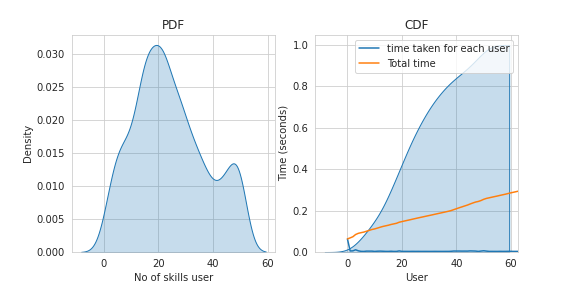

In [53]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = plt.subplot(121)
sns.kdeplot(no_of_skills_per_user, shade=True, ax=ax1)
plt.xlabel('No of skills user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_skills_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of skills by user')
plt.title('CDF')

plt.show()


In [54]:
 no_of_skills_per_user.describe()

count    1367.000000
mean       24.163862
std        13.182115
min         1.000000
25%        15.000000
50%        22.000000
75%        33.000000
max        50.000000
Name: rating, dtype: float64

In [55]:
#interesting stuff with quantiles

In [56]:
quantiles = no_of_skills_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

In [57]:
quantiles[::5]

0.00     1
0.05     4
0.10     7
0.15    10
0.20    13
0.25    15
0.30    16
0.35    18
0.40    19
0.45    21
0.50    22
0.55    24
0.60    26
0.65    28
0.70    30
0.75    33
0.80    36
0.85    41
0.90    45
0.95    49
1.00    50
Name: rating, dtype: int64

In [58]:
##Creating sparse matrix from dataframe

In [59]:
# We have 1367 users and 6473 skills only in training data..if we create sparse data most of the entries are empty...

In [60]:
#1367*6473= 8848591, let's take 4 bytes for each entry....3,53,94,364 means 35.something mb...we can mostly reduce that ram with scipy.sparse.csr_matrix

In [61]:
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user_id.values,
                                               train_df.skill_id.values)),)
    
    print('Done. It\'s shape is : (user, skill) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.108792


In [62]:
#The Sparsity of train sparse matrix

In [63]:
us,sk = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*sk))) * 100) )

Sparsity Of Train matrix : 99.72031654896767 % 


In [64]:
####So 99.something percent values are empty in the sparse matrix..

In [65]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user_id.values,
                                               test_df.skill_id.values)))
    
    print('Done. It\'s shape is : (user, skill) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.059892


In [66]:
us,sk = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*sk))) * 100) )

Sparsity Of Test matrix : 99.9300852622882 % 


In [67]:
#Finding average of all skill ratings , average rating per user, average rating per skill

In [68]:
# get the user averages in dictionary (key: user_id/skill_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Skilll axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that skill or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR skill..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_skill ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

In [69]:
    #finding average of all skill ratings

In [70]:
train_averages = dict()
# get the average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 5.0}

In [71]:
    ##find average rating per user

In [72]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 5.0


In [73]:
#average rating per skill
train_averages['skill'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of skill 15 :',train_averages['skill'][15])


 AVerage rating of skill 15 : 5.0


In [74]:
###Cold start problem
total_skills = len(np.unique(df.skills))
skills_train = len(train_averages['skill'])
new_skills = total_skills - skills_train

print('\nTotal number of Skills  :', total_skills)
print('\nNumber of Users in Train data :', skills_train)
print("\nNo of Skills that didn't appear in train data: {}({} %) \n ".format(new_skills,
                                                                        np.round((new_skills/total_skills)*100, 2)))


Total number of Skills  : 7313

Number of Users in Train data : 6473

No of Skills that didn't appear in train data: 840(11.49 %) 
 


In [75]:
###This cold start problem may occur problem in results because we have performed this cold start problem for skill and got...11 percent...but the dataframe is sorted by user_id...if we apply this cold start problem on user...we may get 100 percent as there are no users in the test data who are in train data

In [76]:
#Computing similarity matrices 

In [77]:
###Computing user-user similarity matrix

In [78]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

In [79]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

Computing top 100 similarities for each user..
computing done for 20 users [  time elapsed : 0:00:00.144317  ]
computing done for 40 users [  time elapsed : 0:00:00.205803  ]
computing done for 60 users [  time elapsed : 0:00:00.284782  ]
computing done for 80 users [  time elapsed : 0:00:00.344774  ]
computing done for 100 users [  time elapsed : 0:00:00.404074  ]
Creating Sparse matrix from the computed similarities
----------------------------------------------------------------------------------------------------
Time taken : 0:00:00.429196


In [80]:
### Skill-Skill similarity

In [81]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing Skill_Skill similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (7313, 7313)  dimensional matrix
0:00:00.295095


In [82]:
m_m_sim_sparse.shape

(7313, 7313)

In [83]:
skill_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [84]:
start = datetime.now()
similar_skills = dict()
for skill in skill_ids:
    # get the top similar skills and store them in the dictionary
    sim_skills = m_m_sim_sparse[skill].toarray().ravel().argsort()[::-1][1:]
    similar_skills[skill] = sim_skills[:100]
print(datetime.now() - start)

# just testing similar skills for skill_15
similar_skills[15]

0:00:02.363423


array([2228, 5849, 2489, 2921, 2920, 4950, 4953, 4957, 6608, 6267, 4955,
       3740, 5802, 3653, 5714, 4949, 6333, 1031, 1502, 4764, 5813, 4809,
       5996, 5396, 6012, 4835, 2435, 2398, 2428, 2429, 2430, 2431, 2432,
       2433, 2434, 2439, 2399, 2441, 2436, 2440, 2437, 2401, 2400, 2438,
       2427, 2426, 2402, 2416, 2407, 2408, 2409, 2406, 2410, 2411, 2412,
       2413, 2414, 2415, 2417, 2403, 2418, 2419, 2420, 2442, 2422, 2423,
       2405, 2424, 2425, 2404, 2421, 7312, 2443, 2483, 2472, 2473, 2474,
       2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2484, 2444, 2485,
       2486, 2487, 2488, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2471,
       2470])

In [85]:
df

,skills,Name,rating,skill_id,user_id
0,Oracle E-Business Suite,hariseth,5,4294,507
1,Shared Services,hariseth,5,5666,507
2,Business Process Improvement,hariseth,5,789,507
3,Oracle HR,hariseth,5,4303,507
4,ERP,hariseth,5,1943,507
...,...,...,...,...,...
41286,Leadership,pratyushseth,5,3405,965
41287,MapReduce,pratyushseth,5,3657,965
41288,Cloud Computing,pratyushseth,5,1143,965
41289,REST,pratyushseth,5,4997,965


In [86]:
data=df[['skill_id','skills']]
data = data.drop_duplicates('skill_id')
data.iloc[:int(data.shape[0]*0.8)].to_csv("skill_titles.csv",index=False)

In [87]:
###Find most similar skills using similarity matrix

In [88]:
skill_titles=pd.read_csv("skill_titles.csv",index_col='skill_id')
skill_titles.head()

,skills
skill_id,
4294,Oracle E-Business Suite
5666,Shared Services
789,Business Process Improvement
4303,Oracle HR
1943,ERP


In [89]:
###Similar skills for Business Process Improvement

In [90]:
sk_id = 789

print("\nSkill ----->",skill_titles.loc[sk_id].values[0])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,sk_id].getnnz()))

print("\nWe have {} Skills which are similar to this  and we will get only top most..".format(m_m_sim_sparse[:,sk_id].getnnz()))


Skill -----> Business Process Improvement

It has 93 Ratings from users.

We have 1016 Skills which are similar to this  and we will get only top most..


In [91]:
similarities = m_m_sim_sparse[sk_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(skill_ids)

In [92]:
### Top 10 similar skills

In [93]:
skill_titles.loc[sim_indices[:10]]

,skills
skill_id,
784,Business Process
742,Business Analysis
794,Business Process Re-engineering
4740,Process Improvement
1031,Change Management
764,Business Intelligence
2956,IT Strategy
4809,Program Management
806,Business Transformation


In [94]:
skill_titles.head()

,skills
skill_id,
4294,Oracle E-Business Suite
5666,Shared Services
789,Business Process Improvement
4303,Oracle HR
1943,ERP


In [95]:
def find_similar_skill(id):
    sk_id = id

    print("\nSkill ----->",skill_titles.loc[sk_id].values[0])

    print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,sk_id].getnnz()))

    print("\nWe have {} Skills which are similar to this  and we will get only top most..".format(m_m_sim_sparse[:,sk_id].getnnz()))
    similarities = m_m_sim_sparse[sk_id].toarray().ravel()

    similar_indices = similarities.argsort()[::-1][1:]

    similarities[similar_indices]

    sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(Skill_ids)
    print(skill_titles.loc[sim_indices[:10]])

In [96]:
find_similar_skill(1143)


Skill -----> Cloud Computing

It has 90 Ratings from users.

We have 1081 Skills which are similar to this  and we will get only top most..
                               skills
skill_id                             
2111              Enterprise Software
5486                             SaaS
3102                      Integration
5813      Software Project Management
4679                        Pre-sales
2096          Enterprise Architecture
5799             Software Development
5839            Solution Architecture
2956                      IT Strategy
4773               Product Management


In [97]:
get_id=df.loc[df['skills']=='Cloud Computing','skill_id'].iloc[0]
print(get_id)

1143


In [98]:
skill_titles.columns

Index(['skills'], dtype='object')

In [99]:
def find_similar_skill(skill):
    sk_id=df.loc[df['skills']==skill,'skill_id'].iloc[0]

    print("\nSkill ----->",skill_titles.loc[sk_id].values[0])

    print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,sk_id].getnnz()))

    print("\nWe have {} Skills which are similar to this  and we will get only top most..".format(m_m_sim_sparse[:,sk_id].getnnz()))
    similarities = m_m_sim_sparse[sk_id].toarray().ravel()

    similar_indices = similarities.argsort()[::-1][1:]

    similarities[similar_indices]

    sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(Skill_ids)
    print(skill_titles.loc[sim_indices[:10]])

In [100]:
find_similar_skill('Cloud Computing')


Skill -----> Cloud Computing

It has 90 Ratings from users.

We have 1081 Skills which are similar to this  and we will get only top most..
                               skills
skill_id                             
2111              Enterprise Software
5486                             SaaS
3102                      Integration
5813      Software Project Management
4679                        Pre-sales
2096          Enterprise Architecture
5799             Software Development
5839            Solution Architecture
2956                      IT Strategy
4773               Product Management


In [101]:
find_similar_skill('Oracle E-Business Suite')


Skill -----> Oracle E-Business Suite

It has 16 Ratings from users.

We have 275 Skills which are similar to this  and we will get only top most..
                                      skills
skill_id                                    
4284                     Oracle Applications
4308                          Oracle Reports
4303                               Oracle HR
543                             BI Publisher
1943                                     ERP
4293                       Oracle Discoverer
2108      Enterprise Resource Planning (ERP)
4124                                   OBIEE
4302                Oracle Fusion Middleware
4298                            Oracle Forms


In [102]:
find_similar_skill('ERP')


Skill -----> ERP

It has 57 Ratings from users.

We have 647 Skills which are similar to this  and we will get only top most..
                                      skills
skill_id                                    
784                         Business Process
764                    Business Intelligence
2108      Enterprise Resource Planning (ERP)
4294                 Oracle E-Business Suite
4284                     Oracle Applications
4303                               Oracle HR
2956                             IT Strategy
902                                      CRM
5344                           SAP Netweaver
4679                               Pre-sales


In [103]:
find_similar_skill("Software Development")


Skill -----> Software Development

It has 187 Ratings from users.

We have 1519 Skills which are similar to this  and we will get only top most..
                               skills
skill_id                             
245               Agile Methodologies
5813      Software Project Management
5193            Requirements Analysis
5396                             SDLC
5839            Solution Architecture
5447                              SQL
3102                      Integration
6806                     Web Services
3254                             Java
6944                              XML


In [104]:
find_similar_skill("Java")


Skill -----> Java

It has 203 Ratings from users.

We have 1538 Skills which are similar to this  and we will get only top most..
                           skills
skill_id                         
833                           C++
821                             C
3266                   JavaScript
5447                          SQL
3979                        MySQL
4930                       Python
2699                         HTML
3491                        Linux
3259      Java Enterprise Edition
5799         Software Development


In [105]:
find_similar_skill('C')


Skill -----> C

It has 144 Ratings from users.

We have 1298 Skills which are similar to this  and we will get only top most..
                    skills
skill_id                  
833                    C++
3254                  Java
2699                  HTML
4930                Python
3491                 Linux
4816           Programming
5447                   SQL
3823      Microsoft Office
3266            JavaScript
274             Algorithms


In [252]:
pip install scikit-surprise

^C
Traceback (most recent call last):
  File "/home/teja1805/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/teja1805/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/teja1805/anaconda3/lib/python3.8/site-packages/pip/__main__.py", line 23, in <module>
    from pip._internal.cli.main import main as _main  # isort:skip # noqa
  File "/home/teja1805/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/teja1805/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/teja1805/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/home/teja1805/an

In [244]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_skills, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    skills = np.unique(col_ind)

    print("Original Matrix : (users, skills) -- ({} {})".format(len(users), len(skills)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_skills = np.random.choice(skills, no_skills, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_skills) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_skills)+1))

    if verbose:
        print("Sampled Matrix : (users, skills) -- ({} {})".format(len(sample_users), len(sample_skills)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

In [245]:
#Sampling Data

In [246]:
###Build sample train data from train data

In [248]:
start = datetime.now()
path = "sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k skills from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=1200, no_skills=1000,
                                             path = path)

print(datetime.now() - start)

Original Matrix : (users, skills) -- (1367 6473)
Original Matrix : Ratings -- 33032

Sampled Matrix : (users, skills) -- (1200 1000)
Sampled Matrix : Ratings -- 4299
Saving it into disk for furthur usage..
Done..

0:00:00.044949


In [251]:
start = datetime.now()

path = "sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=500, no_skills=500,
                                                 path = "sample_test_sparse_matrix.npz")
print(datetime.now() - start)

Original Matrix : (users, skills) -- (724 2516)
Original Matrix : Ratings -- 8259

Sampled Matrix : (users, skills) -- (500 500)
Sampled Matrix : Ratings -- 943
Saving it into disk for furthur usage..
Done..

0:00:00.025280
